<a href="https://colab.research.google.com/github/Noctua28/Machine-Learning-Classification/blob/main/Spanish_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Source: 

### [Spanish Wine Quality](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download) by Fedesoriano from Kaggle


## Data Description: 

### The dataset consists of information related to red variants of Spanish wines. It includes 11 features describing the wines, such as winery name, wine name, harvest year, average rating given by users, number of reviews, country of origin (Spain), region, price in euros, wine variety, body score (richness and weight of the wine), and acidity score (tartness and refreshing factor). 

# Target:

### The target variable of this dataset is the quality of the wine. 

# Regression or Classification?

This will be treated as a regression problem. 

Regression aims to predict a continuous numerical value, which is suitable for predicting the wine quality ratings.

## Loading Dataset:

In [42]:
# Loading dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science Boot Camp/Machine Learning Introduction/W3 - Classification Models/wines_SPA.csv')
print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [43]:
# How many features does it have? 
num_features = df.shape[1]
print("Number of Features", num_features)

Number of Features 11


In [44]:
# How many rows are in the dataset?
num_rows = df.shape[0]
print("Number of rows", num_rows)

Number of rows 7500


## Identifying Potential Challenges with the data & addressing them

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.loc[:, 'type'] = df['type'].str.lower()

# Deleting duplicate rows
df = df.drop_duplicates()

# Identifying and addressing missing values
print("Missing Values:")
print(df.isnull().sum())  # Check for missing values

# Drop rows with missing values
df = df.dropna()

# Identifying and correcting inconsistencies in categorical values
df['type'] = df['type'].str.lower()  # Convert 'type' column to lowercase


# Calculate value counts for each categorical column
categorical_columns = ['winery', 'wine', 'region', 'type']
target_column = 'rating'

for column in categorical_columns:
    value_counts = df[column].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < 0.03].index.tolist()
    
    # Exclude the target column from rare category removal
    if column != target_column:
        df = df[~df[column].isin(rare_categories)]
        
    print(f"Value Counts for {column}:")
    print(value_counts)
    print("-------------------------------")

# Verify the updated dataset
print(df.head())

Missing Values:
winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64
Value Counts for winery:
Vega Sicilia           0.053521
Alvaro Palacios        0.025915
Artadi                 0.023099
Marques de Murrieta    0.018592
Martinet               0.016901
                         ...   
David Moreno           0.000563
Edra                   0.000563
Valdelosfrailes        0.000563
Briego                 0.000563
Clos Pons              0.000563
Name: winery, Length: 425, dtype: float64
-------------------------------
Value Counts for wine:
Unico                             0.431579
Valbuena 5o                       0.326316
Unico Reserva Especial Edicion    0.242105
Name: wine, dtype: float64
-------------------------------
Value Counts for region:
Ribera del Duero    1.0
Name: region, dtype: float64
----------------------

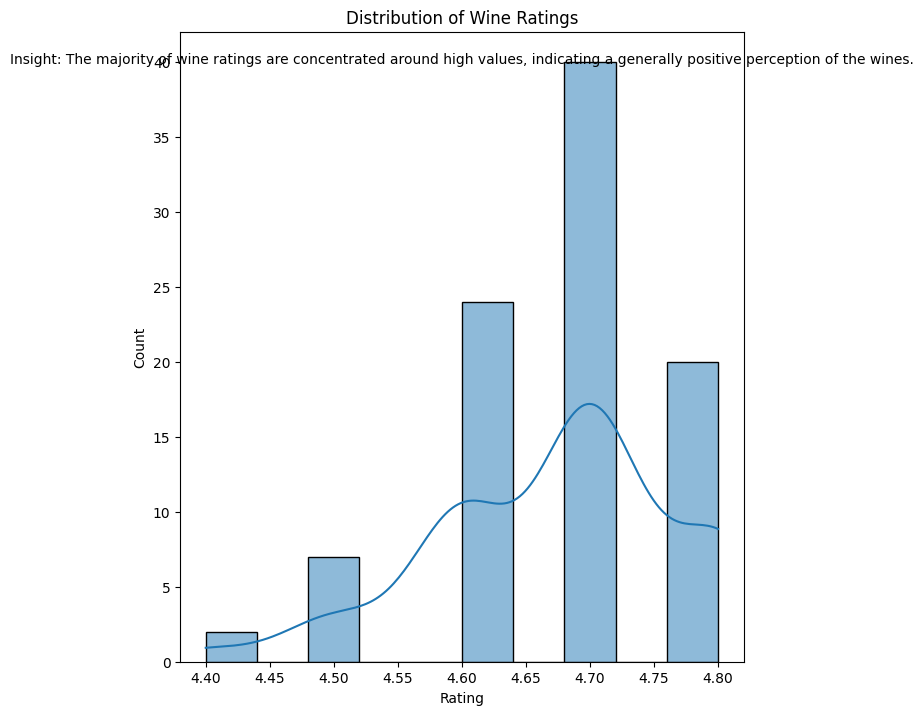

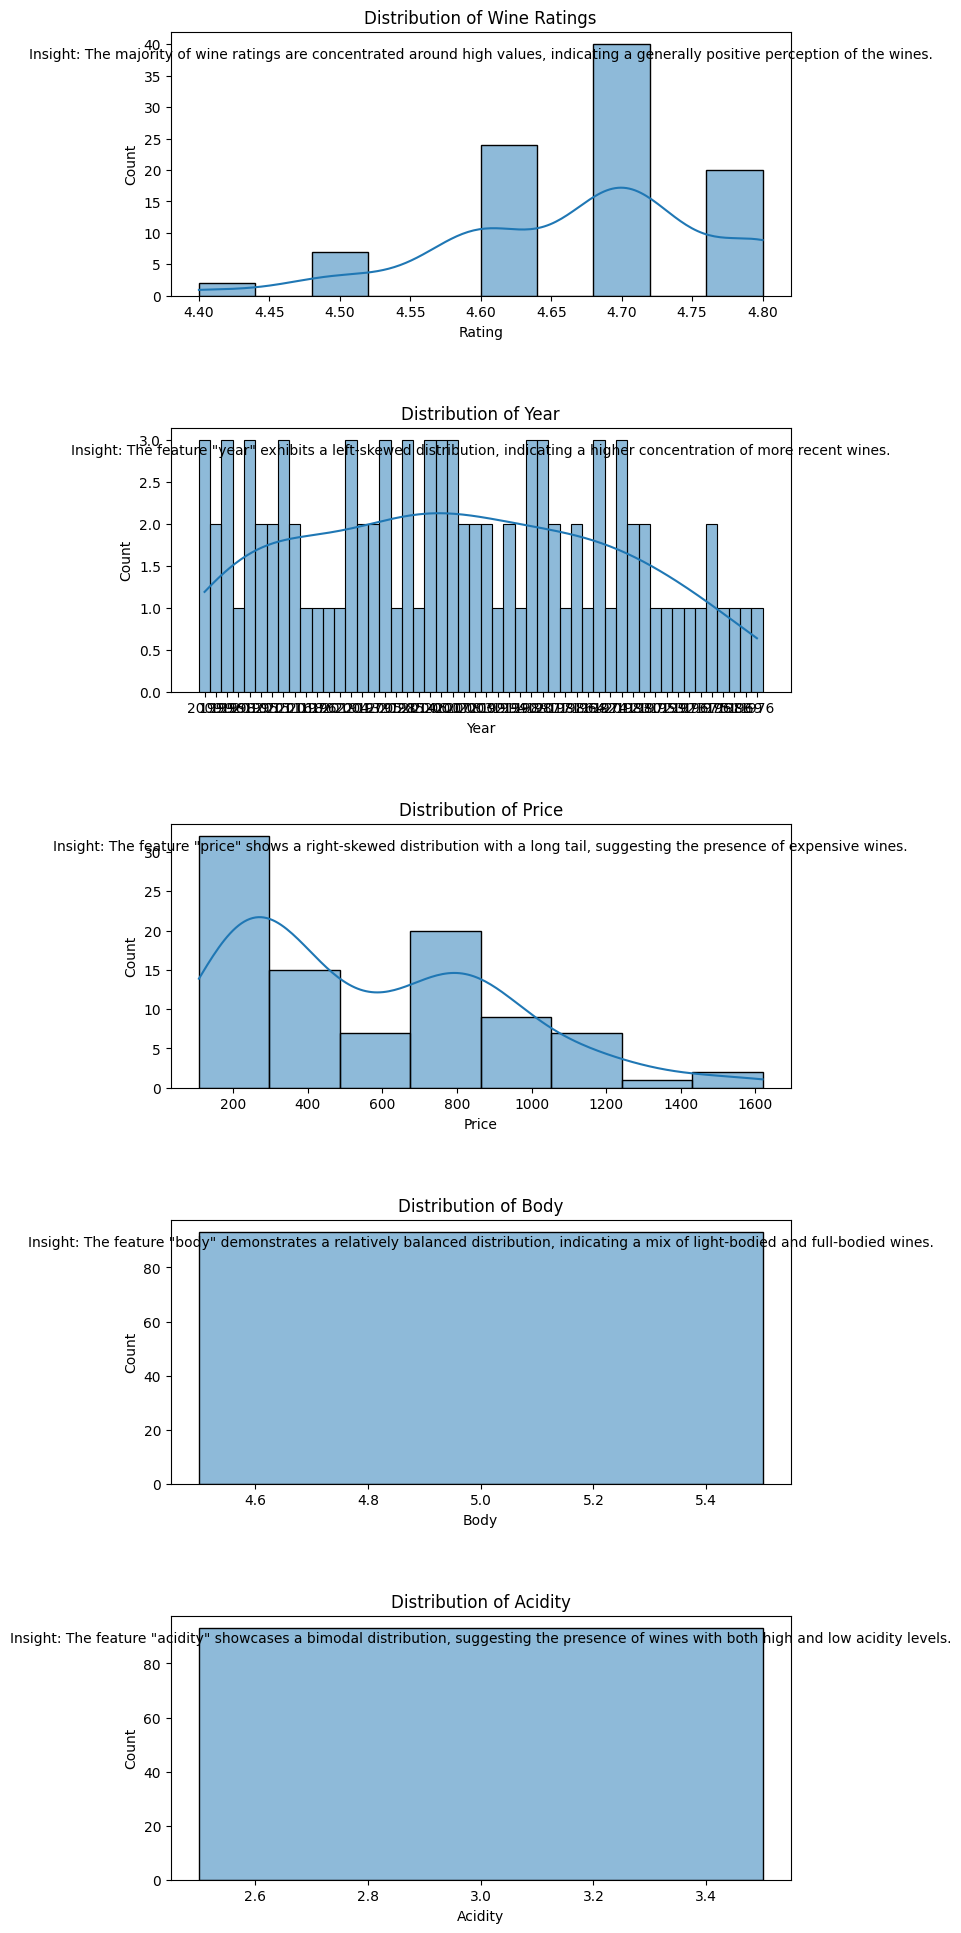

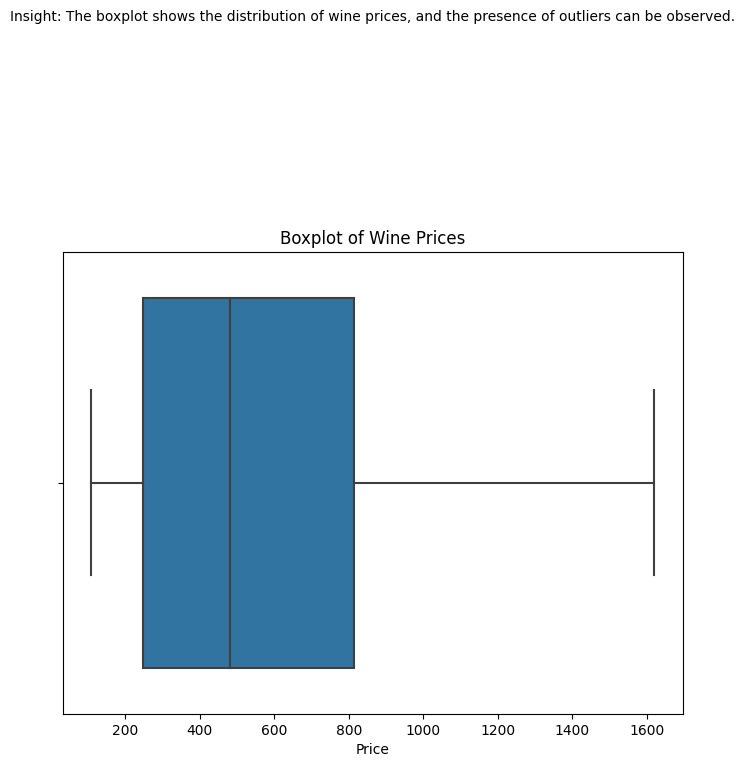

In [53]:
# Univariate visuals for the target and features
plt.figure(figsize=(16, 18))

# Target variable (rating)
plt.subplot(2, 2, 1)
sns.histplot(df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Wine Ratings')
plt.annotate('Insight: The majority of wine ratings are concentrated around high values, indicating a generally positive perception of the wines.',
             xy=(0.5, 0.95), xycoords='axes fraction', fontsize=10, ha='center')

# Features
features = ['year', 'price', 'body', 'acidity']
insights = [
    'Insight: The feature "year" exhibits a left-skewed distribution, indicating a higher concentration of more recent wines.',
    'Insight: The feature "price" shows a right-skewed distribution with a long tail, suggesting the presence of expensive wines.',
    'Insight: The feature "body" demonstrates a relatively balanced distribution, indicating a mix of light-bodied and full-bodied wines.',
    'Insight: The feature "acidity" showcases a bimodal distribution, suggesting the presence of wines with both high and low acidity levels.'
]

num_features = len(features)  # Get the number of features dynamically

plt.figure(figsize=(8, 6 * num_features))  # Adjust the figure size based on the number of features

# Target variable (rating)
plt.subplot(num_features + 1, 1, 1)  # Adjust the number of rows dynamically
sns.histplot(df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Wine Ratings')
plt.annotate('Insight: The majority of wine ratings are concentrated around high values, indicating a generally positive perception of the wines.',
             xy=(0.5, 0.9), xycoords='axes fraction', fontsize=10, ha='center')

# Features
for i, feature in enumerate(features, start=2):
    plt.subplot(num_features + 1, 1, i)  # Adjust the number of rows dynamically
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.annotate(insights[i-2], xy=(0.5, 0.9), xycoords='axes fraction', fontsize=10, ha='center')

# Adjust spacing between years on x-axis
plt.subplots_adjust(hspace=0.5)

plt.show()


# Identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Wine Prices')

# Adjust the spacing between insight and title
plt.annotate('Insight: The boxplot shows the distribution of wine prices, and the presence of outliers can be observed.',
             xy=(0.5, 1.5), xycoords='axes fraction', fontsize=10, ha='center')

plt.show()

# Removing outliers based on a threshold (e.g., 3 standard deviations)
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
df = df[abs(z_scores) < 3]

# Commented steps:
# - Duplicate rows were dropped to ensure data integrity.
# - Missing values were identified using the `isnull().sum()` method, and rows with missing values were dropped using `dropna()`.
# - Inconsistencies in the 'type' column were addressed by converting all values to lowercase.
# - Univariate histograms were plotted to visualize the distribution of the target variable ('rating') and other features.
# - Outliers in the 'price' column were identified and removed based on a threshold of 3 standard deviation.

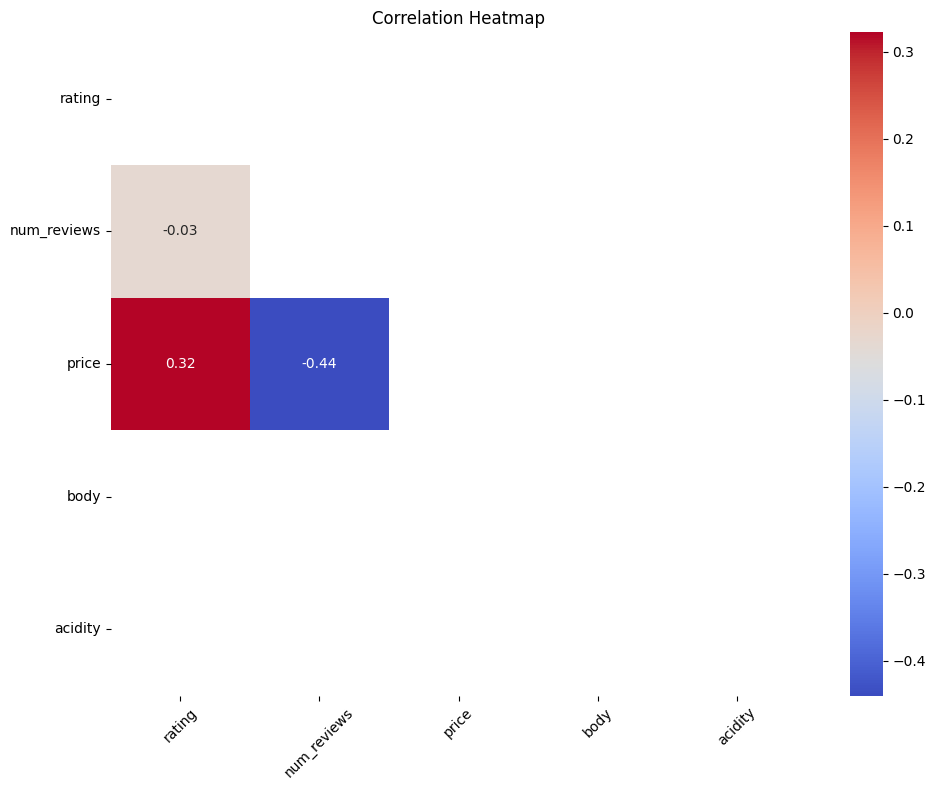

In [52]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle (optional, for better visualization)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure and axes
plt.figure(figsize=(10, 8))
ax = plt.axes()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", cbar=True, ax=ax)

# Customize the plot
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


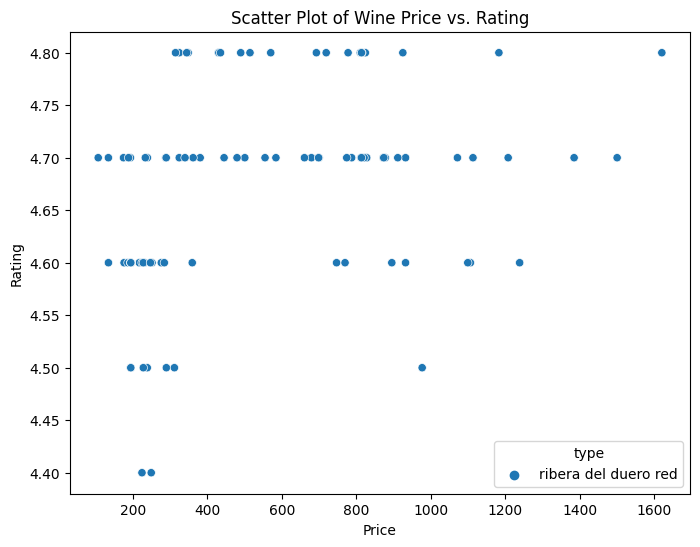

In [49]:
# Create a scatter plot with hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='rating', hue='type')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Wine Price vs. Rating')
plt.show()

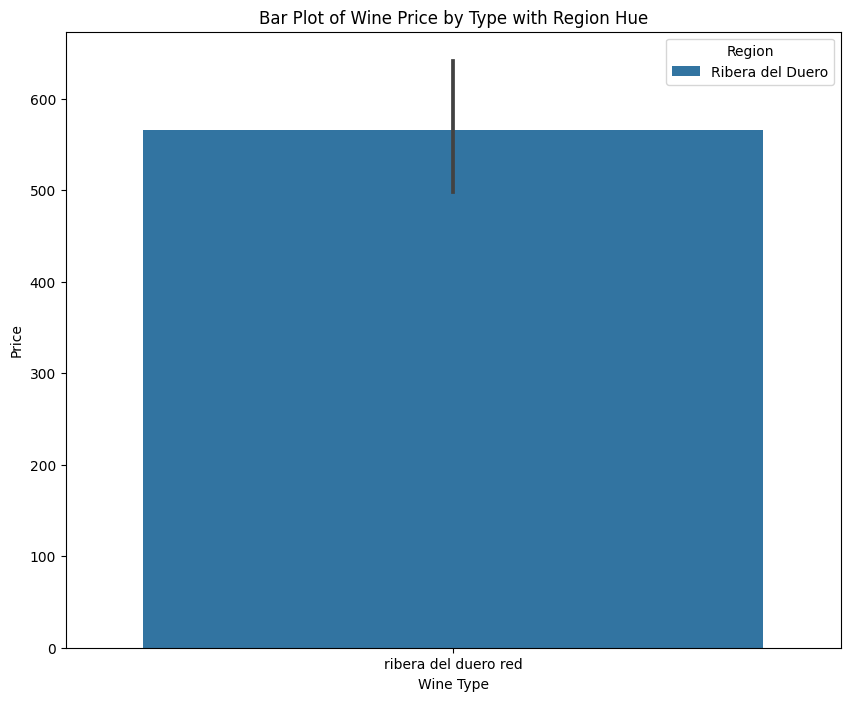

In [50]:
# Create a bar plot with hue
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='type', y='price', hue='region')
plt.xlabel('Wine Type')
plt.ylabel('Price')
plt.title('Bar Plot of Wine Price by Type with Region Hue')
plt.legend(title='Region', loc='upper right')
plt.show()